In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio

#  二维数据压缩

读入二维数据

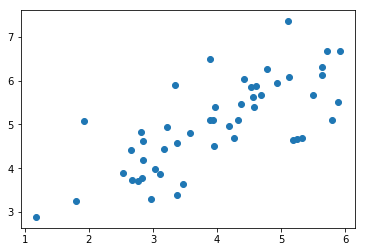

(50, 2)


0.816496580927726

In [2]:
data = sio.loadmat('data/ex7data1.mat')
X = data.get('X')
plt.scatter(X[:, 0], X[:, 1])
plt.show()
print(X.shape)
a = np.array([1,2,3])
np.std(a)


定义相关函数

In [3]:
def normalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    return (X-mu)/sigma

In [4]:
def pca(X):      
    Sigma = np.dot(X.T,X) / X.shape[0]
    U, S, V = np.linalg.svd(Sigma)
    return U,S,V

In [5]:
#进行压缩
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)
#压缩重现
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)
#计算压缩偏差
def get_dev(S,k):
    dev = np.sum(S[:k,])/np.sum(S)
    print('k=',k,';dev=',dev)
    return dev

运算并可视化

k= 1 ;dev= 0.8677651881696647


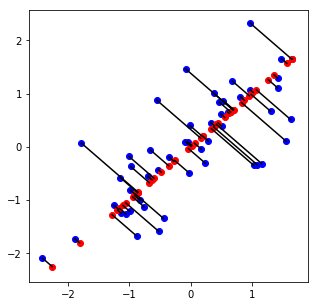

In [6]:
X = normalize(X)
U,S,V = pca(X)
Z = project_data(X, U, 1)
X_recovered = recover_data(Z, U, 1)
Z_0 = np.zeros_like(Z)
dev = get_dev(S,1)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1],c = 'B',marker='o')
plt.scatter(X_recovered[:, 0], X_recovered[:, 1],c = 'R',marker='o')
for i in range(X.shape[0]):
    plt.plot([X[i][0],X_recovered[i][0]],[X[i][1],X_recovered[i][1]],color = 'black')
#plt.scatter(Z,Z_0,c='g',marker='+')
plt.show()

# 压缩人脸数据

(5000, 1024)


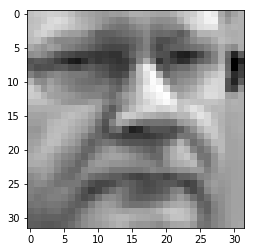

In [7]:
X2 = sio.loadmat('./data/ex7faces.mat')
X2 = X2['X']
print(X2.shape)
face = np.array([x.reshape((32, 32)).T for x in X2])
plt.imshow(face[5],cmap='gray')
plt.show()

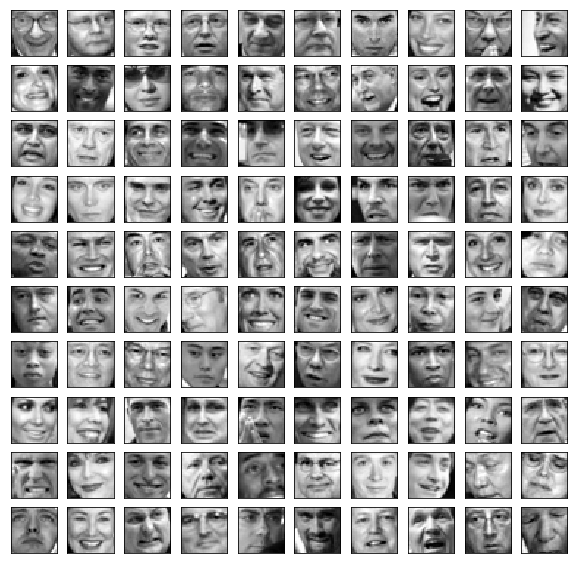

In [8]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    grid_size = int(np.sqrt(n))
    
    first_n_images = X[:n,:,:]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,sharey=True, sharex=True, figsize=(10, 10))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c],cmap='gray')
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

plot_n_image(face, n=100)

k= 36 ;dev= 0.8590715310088942


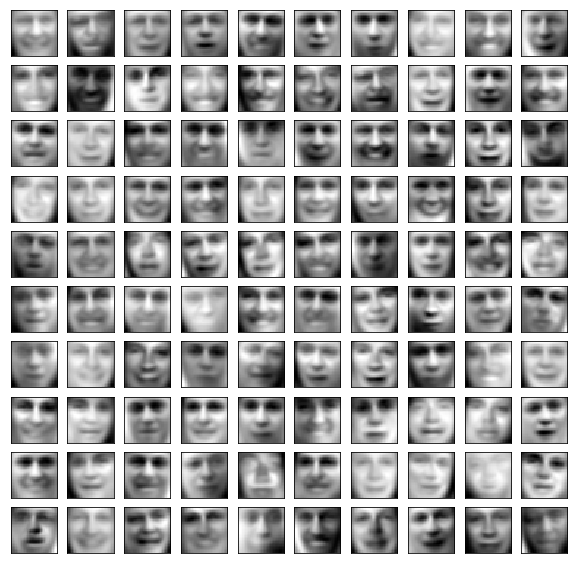

In [9]:
U, S, V = pca(X2)
Z = project_data(X2, U, 16)
dev = get_dev(S,36)
X_recovered = recover_data(Z, U, 16)
face_recovered = np.array([x.reshape((32, 32)).T for x in X_recovered])
plot_n_image(face_recovered, n=100)

对图片使用pca,将三维压缩为二维，并在2d图像上将聚类结果显示出来。

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


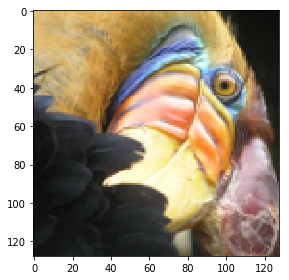

In [10]:
from skimage import io


pic = io.imread('data/bird_small.png') / 255.
io.imshow(pic)
pic = pic.reshape(-1,3)
pic_norm = normalize(pic)

In [11]:
U, S, V = pca(pic_norm)
pic_proj = project_data(pic_norm, U, 2)
print(pic_proj.shape)

(16384, 2)


In [12]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 16, n_init = 100, n_jobs=-1)
kmeans_model.fit(pic)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
centroids = kmeans_model.cluster_centers_
index = kmeans_model.predict(pic)

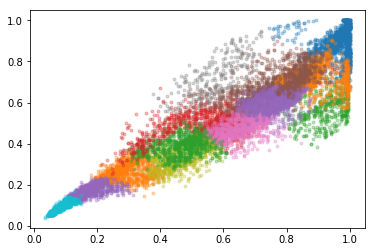

In [14]:
subX = []
for x in range(np.max(index)+1):
    subX.append(np.array([pic[i] for i in range(pic_proj.shape[0]) if index[i] == x]))
for x in range(np.max(index)+1):
    plt.plot(subX[x][:,0],subX[x][:,1],'.',alpha=0.3)